<a href="https://colab.research.google.com/github/Huxwell/caffe-colab/blob/main/caffe_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
This notebook shows how to get Caffe with GPU support running in Google Colab. I recommend using the manually compiled version - it gives a lot of power, enables to read, understand and change the framework's code easily.

If you have any problems, please refer [to the medium article](https://filip-drapejkowski.medium.com/caffe-in-google-colab-2021-2d730989c849
) which describes why each steps are necessary and hints how to deal with any future problems.

# GPU setup

## Runtime -> Change Runetime type -> Hardware acccelarator -> GPU

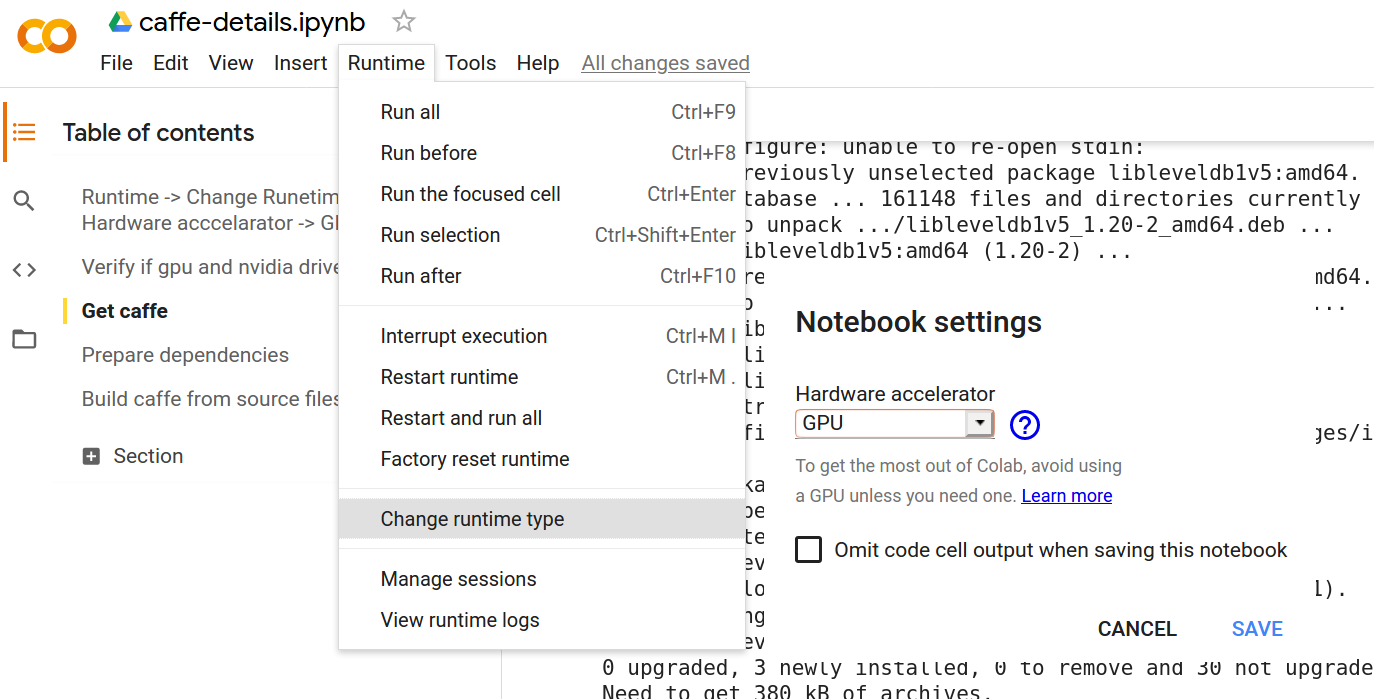

## Verify if gpu and nvidia drivers are present.

In [ ]:
!nvidia-smi

# Get caffe

In [ ]:
# !sudo apt build-dep caffe-cuda
# This fails for me

In [ ]:
!ls

In [ ]:
!git clone https://github.com/BVLC/caffe.git
!git reset --hard 9b891540183ddc834a02b2bd81b31afae71b2153 #reset to the newest revision that worked OK on 27.03.2021

# Install Prepare dependencies

In [ ]:
# !sudo apt-cache search libhdf5-
# !sudo apt-cache search gflags
# !sudo apt --fix-broken install
!sudo apt-get install libgflags2.2 
!sudo apt-get install libgflags-dev
!sudo apt-get install libgoogle-glog-dev
# !sudo apt-get install libhdf5-10 - replaced with 100
!sudo apt-get install libhdf5-100
!sudo apt-get install libhdf5-serial-dev
!sudo apt-get install libhdf5-dev
# !sudo apt-get install libhdf5-cpp-11 - replaced with 100
!sudo apt-get install libhdf5-cpp-100
!sudo apt-get install libprotobuf-dev protobuf-compiler

In [ ]:
!find /usr -iname "*hdf5.so"
# got: /usr/lib/x86_64-linux-gnu/hdf5/serial
!find /usr -iname "*hdf5_hl.so"

In [ ]:
!ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial.so /usr/lib/x86_64-linux-gnu/libhdf5.so
!ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so /usr/lib/x86_64-linux-gnu/libhdf5_hl.so

In [ ]:
#!find /usr -iname "*hdf5.h*" # got:
# /usr/include/hdf5/serial/hdf5.h 
# /usr/include/opencv2/flann/hdf5.h
# Let's try the first one.
%env CPATH="/usr/include/hdf5/serial/"
#fatal error: hdf5.h: No such file or directory

In [ ]:
!sudo apt-get install libleveldb-dev
!sudo apt-get install libgflags-dev libgoogle-glog-dev liblmdb-dev
!sudo apt-get install libsnappy-dev

# Build caffe from source files

In [ ]:
!echo $CPATH

In [ ]:
%cd caffe
!ls
!make clean
!cp Makefile.config.example Makefile.config

## Use sed for editing Makefile.config
Just so we don't have to manually open the file with text editor and look where to add the lines below.


In [ ]:
!sed -i 's/-gencode arch=compute_20/#-gencode arch=compute_20/' Makefile.config #old cuda versions won't compile 
!sed -i 's/\/usr\/local\/include/\/usr\/local\/include \/usr\/include\/hdf5\/serial\//'  Makefile.config #one of the 4 things needed to fix hdf5 issues
!sed -i 's/# OPENCV_VERSION := 3/OPENCV_VERSION := 3/' Makefile.config #We actually use opencv 4.1.2, but it's similar enough to opencv 3.
!sed -i 's/code=compute_61/code=compute_61 -gencode=arch=compute_70,code=sm_70 -gencode=arch=compute_75,code=sm_75 -gencode=arch=compute_75,code=compute_75/' Makefile.config #support for new GPUs

In [ ]:
!make all -j 4 # -j would use all availiable cores, but RAM related errors occur

# Verify if caffe works

In [ ]:
import cv2
print(cv2.__version__)
import caffe

## Learn LeNet network on MNIST dataset

In [ ]:
# !./data/mnist/get_mnist.sh #Yann Lecun's hosting sometimes fails with 503 error
# So we use alternative source of mnist dataset
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
!cp -rv MNIST/raw/* data/mnist/


In [ ]:
!./examples/mnist/create_mnist.sh


In [ ]:
!./examples/mnist/train_lenet.sh